# QB's Accuracy vs QB's Aggressiveness

In this project , I want to see if there is an inverse relationship between a quarterback's accuracy and how aggressive a quarterback will be in terms of average depth of target. I will see using two key stats: Adjust Compeletion Percentage and Average Depth of Target (aDOT). I did retrieve data from PFF Elite Subscription. 

Big shoutout to Tej Seth (https://twitter.com/tejfbanalytics) for all the tutorials and inspiration. Without his resources, I would not have made this. Owe this all to him. Some of the code was used from him too.

This project is more of me just learning how I can apply analytics coding with Python


I will also create a model to see if there is truly an inverse relationship 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nflfastpy as nfl
from matplotlib import pyplot as plt

In [2]:
#Import all the passing summary data from 2017 - 2021
pbp_2021 = pd.read_csv('passing_summary_2021.csv')
pbp_2020 = pd.read_csv('passing_summary_2020.csv')
pbp_2019 = pd.read_csv('passing_summary_2019.csv')
pbp_2018 = pd.read_csv('passing_summary_2018.csv')
pbp_2017 = pd.read_csv('passing_summary_2017.csv')

qb_2017_2021 = pd.concat([pbp_2021, pbp_2020, pbp_2019, pbp_2018, pbp_2017])

In [3]:
#Filter to just quarterbacks from the passing summary 
qb = qb_2017_2021[qb_2017_2021.position == "QB"]
qb

,player,player_id,position,team_name,player_game_count,accuracy_percent,aimed_passes,attempts,avg_depth_of_target,avg_time_to_throw,...,sack_percent,sacks,scrambles,spikes,thrown_aways,touchdowns,turnover_worthy_plays,twp_rate,yards,ypa
0,Tom Brady,698,QB,TB,19,76.4,766,810,8.2,2.33,...,3.4,29,10,2,27,46,16,1.8,5916,7.3
1,Patrick Mahomes,11765,QB,KC,20,79.2,708,780,7.4,2.87,...,4.2,37,61,0,58,48,24,2.6,5896,7.6
2,Matthew Stafford,4924,QB,LA,21,76.6,709,741,8.9,2.66,...,4.7,37,15,1,16,50,29,3.5,6074,8.2
3,Josh Allen,46601,QB,BUF,19,74.8,651,708,9.1,2.89,...,3.5,28,55,0,36,45,27,3.2,5044,7.1
4,Derek Carr,8671,QB,LV,18,77.0,631,680,8.4,2.73,...,5.8,43,19,4,29,24,25,3.2,5114,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Cooper Rush,12324,QB,DAL,2,50.0,2,3,0.0,2.13,...,0.0,0,0,0,0,0,0,0.0,2,0.7
68,Teddy Bridgewater,8667,QB,MIN,1,100.0,2,2,2.0,3.10,...,0.0,0,0,0,0,0,0,0.0,0,0.0
71,Chad Henne,4371,QB,JAX,1,0.0,1,2,4.0,3.00,...,0.0,0,0,0,0,0,1,50.0,0,0.0
75,Tyler Bray,8440,QB,KC,1,0.0,1,1,6.0,1.70,...,0.0,0,0,0,0,0,0,0.0,0,0.0


In [12]:
#Create an Adjusted Completion Percentage Table compiled from 2017-2021
qb_comp_calc = qb.groupby(['player', 'player_id'], as_index = False).agg({'aimed_passes': 'sum', 'completions': 'sum', 'attempts':'sum', 'drops': 'sum'})
qb_comp_calc['adjusted_completion_percent'] = (qb_comp_calc['completions'] + qb_comp_calc['drops'])*(100)/(qb_comp_calc['aimed_passes'])
qb_comp = qb_comp_calc[['player', 'player_id', 'attempts', 'adjusted_completion_percent']]
qb_comp

,player,player_id,attempts,adjusted_completion_percent
0,A.J. McCarron,8799,55,65.217391
1,Aaron Rodgers,2241,2641,76.773123
2,Alex Smith,2218,1118,77.201566
3,Alex Tanney,7610,1,100.000000
4,Andrew Luck,7007,707,75.336323
...,...,...,...,...
130,Tyler Bray,8440,6,25.000000
131,Tyler Huntley,46448,206,74.345550
132,Tyrod Taylor,6332,728,70.464768
133,Will Grier,38265,52,61.702128


In [13]:
#Create an aDOT Table compiled from 2017-2021
qb_adot_calc = qb[['player', 'player_id', 'attempts', 'avg_depth_of_target']]
qb_adot_calc['air_yards'] = qb_adot_calc['attempts']*qb_adot_calc['avg_depth_of_target']
qb_adot_calc = qb_adot_calc.groupby(['player', 'player_id'], as_index = False).agg({'attempts':'sum', 'air_yards':'sum'})
qb_adot_calc["adot"] = qb_adot_calc["air_yards"]/qb_adot_calc["attempts"]

qb_adot = qb_adot_calc[['player', 'player_id', 'adot']]
qb_adot

<ipython-input-13-00947f6884aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_adot_calc['air_yards'] = qb_adot_calc['attempts']*qb_adot_calc['avg_depth_of_target']


,player,player_id,adot
0,A.J. McCarron,8799,8.367273
1,Aaron Rodgers,2241,8.563574
2,Alex Smith,2218,7.493739
3,Alex Tanney,7610,1.000000
4,Andrew Luck,7007,8.300000
...,...,...,...
130,Tyler Bray,8440,10.750000
131,Tyler Huntley,46448,8.327184
132,Tyrod Taylor,6332,8.767033
133,Will Grier,38265,9.000000


In [14]:
#Join the aDot table and adjusted completion percentage table
qb_adot_comp = pd.merge(qb_adot, qb_comp, how='left', left_on='player_id', right_on='player_id')
qb_adot_comp = qb_adot_comp[['player_id', 'player_x', 'adot', 'adjusted_completion_percent', 'attempts']]
qb_adot_comp.columns = qb_adot_comp.columns.str.replace('player_x', 'player')
qb_adot_comp = qb_adot_comp[qb_adot_comp.attempts > 382]
qb_adot_comp = qb_adot_comp.reset_index(drop=True)
qb_adot_comp

,player_id,player,adot,adjusted_completion_percent,attempts
0,2241,Aaron Rodgers,8.563574,76.773123,2641
1,2218,Alex Smith,7.493739,77.201566,1118
2,7007,Andrew Luck,8.300000,75.336323,707
3,6187,Andy Dalton,8.399081,72.369878,1959
4,46518,Baker Mayfield,9.185764,73.064340,1995
...,...,...,...,...,...
56,77632,Trevor Lawrence,8.200000,72.394881,602
57,9683,Trevor Siemian,8.809576,69.635628,543
58,60326,Tua Tagovailoa,7.656637,74.806801,678
59,6332,Tyrod Taylor,8.767033,70.464768,728


In [7]:
#Load the team colors from nflfastpy
teams_colors_logos = nfl.load_team_logo_data()

In [8]:
#Get the QB Team to retrieve the color
qb_team = qb.groupby(['player', 'player_id'], as_index = False).agg({"team_name": lambda x: list(x)})
qb_team["team"] = qb_team["team_name"].str.get(0)

#Some changes for abbreviation as it did not align with the spreadsheet
qb_team['team'] = qb_team['team'].replace(['HST', 'CLV', 'ARZ', 'BLT'],['HOU', 'CLE', 'ARI', 'BAL'])

In [9]:
#Join the QB Team and Team Color Table
qb_team_with_color = pd.merge(qb_team, teams_colors_logos, how='left', left_on='team', right_on='team_abbr') 
qb_team_with_color = qb_team_with_color[['player', 'player_id', 'team', 'team_color']]

In [10]:
# Join the QB Team Color and QB ADOT/COMPLETION Tableto a Final DataFrame Table
qb_final = pd.merge(qb_adot_comp, qb_team_with_color, how="left", left_on="player_id", right_on="player_id")
qb_final = qb_final[['player_id', 'player_x', 'attempts', 'adjusted_completion_percent', 'adot', 'team', 'team_color']]
qb_final.columns = qb_final.columns.str.replace('player_x', 'player')
qb_final = qb_final.reset_index(drop=True)
qb_final['team_color'] = qb_final['team_color'].replace(['nan'],'blue')

# Create a Scatterplot Visualization 

Text(0, 0.5, 'Average Depth of Target (ADOT)')

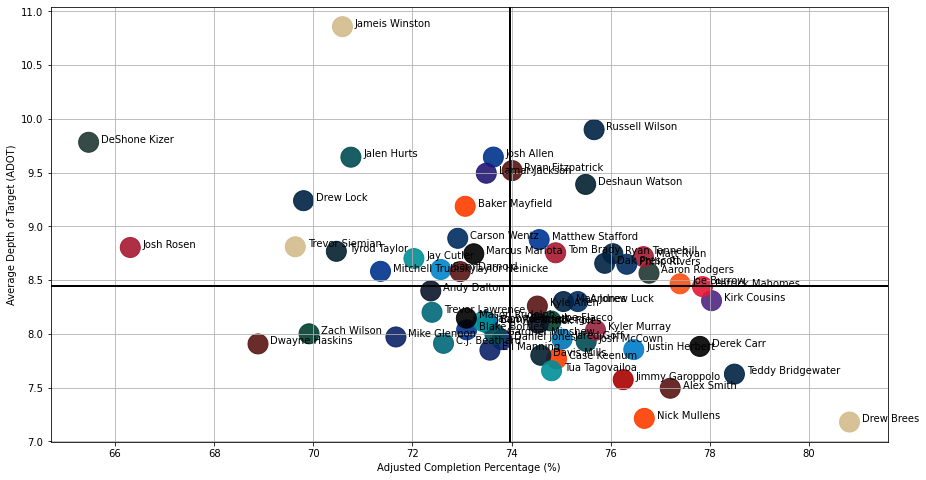

In [11]:
# We will now create the scatterplot visualization

fig, ax = plt.subplots(figsize=(15,8))

ax.axvline(qb_final['adjusted_completion_percent'].mean(), color='black', lw = 2)
ax.axhline(qb_final['adot'].mean(), color='black', lw = 2)

ax.scatter(qb_final['adjusted_completion_percent'], qb_final['adot'], alpha=.9, s = 400,color=qb_final.team_color)

for line in range(0, qb_final.shape[0]):
    plt.text(qb_final.adjusted_completion_percent[line]+0.25, qb_final.adot[line], qb_final.player[line])
plt.grid()
ax.set_xlabel("Adjusted Completion Percentage (%)")
ax.set_ylabel("Average Depth of Target (ADOT)")